# BENO-Investigation

# Training

In [1]:
import os
os.getcwd()

'/content'

In [2]:
!git clone https://github.com/zihanzhou2002/beno.git

Cloning into 'beno'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 107 (delta 2), reused 2 (delta 2), pack-reused 102 (from 1)
Receiving objects: 100% (107/107), 24.58 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [3]:
%cd /content/beno

/content/beno


In [4]:
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.

In [5]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1+cu124
CUDA version: 12.4


In [6]:
# For PyTorch 2.6.0 + CUDA 12.4
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-geometric
!pip install loguru


Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 57.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.9 MB/s eta 0:00:00


In [7]:
import os
os.getcwd()

'/content/beno'

In [8]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pprint as pp
from timeit import default_timer
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import scatter  # Not included in the latest version
from torchvision.transforms import GaussianBlur
import sys, os
# from utilities import *
from utilities import MeshGenerator,GaussianNormalizer,LpLoss
from util import record_data, to_cpu, to_np_array, make_dir
from BE_MPNN import HeteroGNS
from BE_MPNN_GPS import HeteroGNSGPS
import random
from loguru import logger
import matplotlib.tri as tri
from torch_geometric.data import HeteroData
import warnings
warnings.filterwarnings('ignore')
import pdb
fix_seed = 2023
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)
torch.cuda.manual_seed_all(fix_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


## 1. Set training arguments

In [9]:
class Args:
    epochs = 1000
    lr = 0.00005
    inspect_interval = 100
    id = "0"
    init_boudary_loc = "regular"
    boundary_encoding = "GPS"
    trans_layer = 3
    boundary_dim = 128
    batch_size = 1
    act = "silu"
    nmlp_layers = 3
    ns = 100
    n_heads = 4
    bd_shape = "mix"

args = Args()


## 2. Load Data

We aim to solve a $d$-dimensional-differntiable function $u \in C^d(\mathbb R)$ of $N$ interior grid nodes over an open domain $\Omega$. This paper primarily works with Poisson equation with Dirichlet boundar conditions. E.g. for $d = 2$ the data is
$$ \nabla^2 u ([x_1, x_2, \dots, x_d)]) = f([x_1, x_2, \dots, x_d]), \quad \forall ([x_1, \dots, x_d]) \in \Omega$$
$$ u ([x_1, x_2, \dots, x_d)]) = g([x_1, x_2, \dots, x_d]), \quad \forall ([x_1, \dots, x_d]) \in \partial \Omega.$$

Here we load a sample of 10 4-corner dataset

In [10]:
import zipfile
with zipfile.ZipFile('/content/beno/data/Dirichlet/Dirichlet_N32_data_10.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Dirichlet/10')


In [11]:
with zipfile.ZipFile('/content/beno/data/Dirichlet/Dirichlet_N32_data_100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Dirichlet/100')

In [12]:
with zipfile.ZipFile('/content/beno/data/Neumann/Neumann_N32_data_100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Neumann/100')


In [115]:

cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, "data")
f_all = np.load("/content/beno/data/Dirichlet/100/RHS_N32_2c_100.npy") # the source function
sol_all = np.load("/content/beno/data/Dirichlet/100/SOL_N32_2c_100.npy") # the solution
bc_all=np.load("/content/beno/data/Dirichlet/100/BC_N32_2c_100.npy") # the boundary condition
ntrain = 90
ntest =10

In [116]:
gblur = GaussianBlur(kernel_size=5, sigma=5)


batch_size = args.batch_size
batch_size2 = args.batch_size
width = 64
ker_width = 256
depth = 4
edge_features = 7
node_features = 10
ns=args.ns
epochs = args.epochs
learning_rate = args.lr
inspect_interval = args.inspect_interval

runtime = np.zeros(2, )
t1 = default_timer()

resolution = 32
s = resolution
n=s**2


trans_layer = args.trans_layer

path = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc+  '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+'_epochs' + str(args.epochs)

result_path = os.path.join(cwd, "results")
path_model = os.path.join(result_path,path )
make_dir(path_model)

logger.add(os.path.join('log', '{}.log'.format(
            path)), rotation="500 MB", level="INFO")
logger.info(path)


2025-04-02 23:26:57.164 | INFO     | __main__:<cell line: 0>:37 - Resolution_32_poisson_ntrain90_kerwidth256_bd_enc_GPS3_Rollingregular_shapemix_ns100_nheads4_bddim128_actsilulr5e-05_nmlp_layers3_epochs1000


In [117]:
cells_state=f_all[:,:,3] # node type \in {0,1,2,3}
coord_all=f_all[:,:,0:2] # all node corrdinate

bc_euco=bc_all[:,:,0:2]  # boundary corrdinate
bc_value=bc_all[:,:,2].reshape(-1,128,1)   # boundary value
bc_value=torch.tensor(bc_value)
bc_value_1=bc_value[0:900,:,:]
bc_euco=torch.tensor(bc_euco)
bcv_normalizer = GaussianNormalizer(bc_value_1)
bc_value = bcv_normalizer.encode(bc_value)
bc_euco= to_np_array(torch.cat([bc_euco,bc_value],dim=-1))

all_a = f_all[:,:,2] # actual source function values
all_a_smooth = to_np_array(gblur(torch.tensor(all_a.reshape(all_a.shape[0], resolution, resolution))).flatten(start_dim=1))
all_a_reshape = all_a_smooth.reshape(-1, resolution, resolution)

# Calculate gradient using finite difference
all_a_gradx = np.concatenate([
    all_a_reshape[:,1:2] - all_a_reshape[:,0:1],
    (all_a_reshape[:,2:] - all_a_reshape[:,:-2]) / 2,
    all_a_reshape[:,-1:] - all_a_reshape[:,-2:-1],
], 1)
all_a_gradx = all_a_gradx.reshape(-1, n)
all_a_grady = np.concatenate([
    all_a_reshape[:,:,1:2] - all_a_reshape[:,:,0:1],
    (all_a_reshape[:,:,2:] - all_a_reshape[:,:,:-2]) / 2,
    all_a_reshape[:,:,-1:] - all_a_reshape[:,:,-2:-1],
], 2)
all_a_grady = all_a_grady.reshape(-1, n)
all_u = sol_all[:,:,0]

# Setting up train and test dataset
train_a = torch.FloatTensor(all_a[:ntrain])  # [num_train, 4096]
train_a_smooth = torch.FloatTensor(all_a_smooth[:ntrain]) # [num_train, 4096]
train_a_gradx = torch.FloatTensor(all_a_gradx[:ntrain])   # [num_train, 4096]
train_a_grady = torch.FloatTensor(all_a_grady[:ntrain])   # [num_train, 4096]
train_u = torch.FloatTensor(all_u[:ntrain])  # [num_train, 4096]
test_a = torch.FloatTensor(all_a[ntrain:])
test_a_smooth = torch.FloatTensor(all_a_smooth[ntrain:])
test_a_gradx = torch.FloatTensor(all_a_gradx[ntrain:])
test_a_grady = torch.FloatTensor(all_a_grady[ntrain:])
test_u = torch.FloatTensor(all_u[ntrain:])

bc_euco_train=bc_euco[:ntrain,:,:]
bc_euco_test=bc_euco[ntrain:,:,:]

Now check the shape for train and test dataset

This shows that train and test datasets only include the values of source and solution functions, but datasets for boundary conditions include their coordinates which will be used for embedding.

### Visualized the dataset as examples

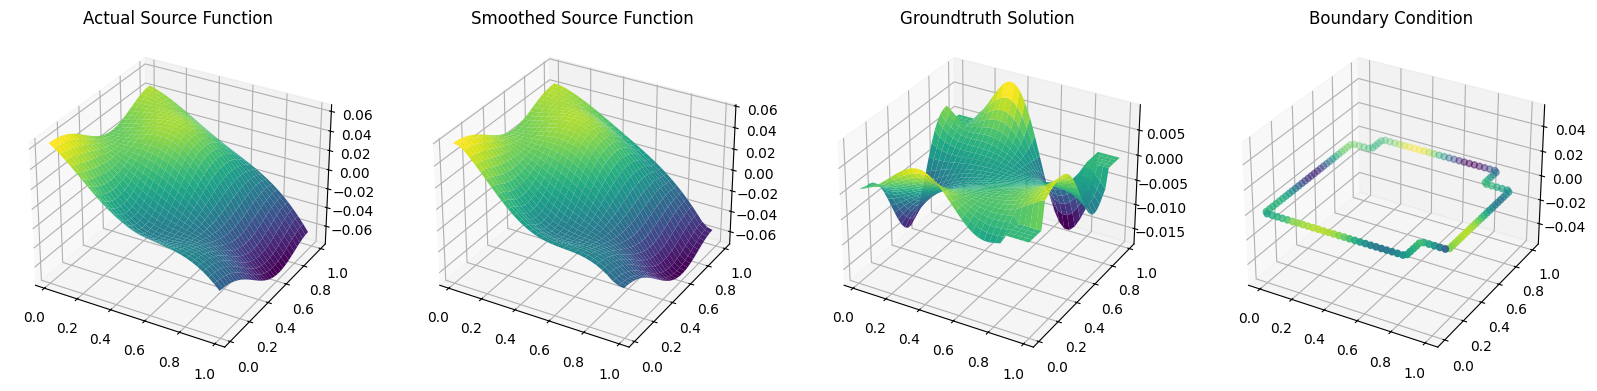

In [19]:
i = 6
x_mesh = coord_all[i,:, 0].reshape(32, 32)
y_mesh = coord_all[i,:, 1].reshape(32, 32)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, subplot_kw={"projection": "3d"}, figsize=(20, 5))

ax1.plot_surface(x_mesh, y_mesh, all_a[i,:].reshape(32, 32), cmap="viridis")
ax1.set_title("Actual Source Function")

ax2.plot_surface(x_mesh, y_mesh, all_a_reshape[i], cmap="viridis")
ax2.set_title("Smoothed Source Function")

ax3.plot_surface(x_mesh, y_mesh, all_u[i].reshape(32, 32), cmap="viridis")
ax3.set_title("Groundtruth Solution")

x_mesh_bc = bc_euco[i][:,0]
y_mesh_bc = bc_euco[i][:,1]

ax4.scatter(x_mesh_bc, y_mesh_bc, c=bc_euco[i,:,2], cmap="viridis")
ax4.set_title("Boundary Condition")
plt.show()

In [20]:
X,  Y = np.meshgrid(x_mesh_bc, y_mesh_bc)


Text(0.5, 1.0, 'Boundary Condition')

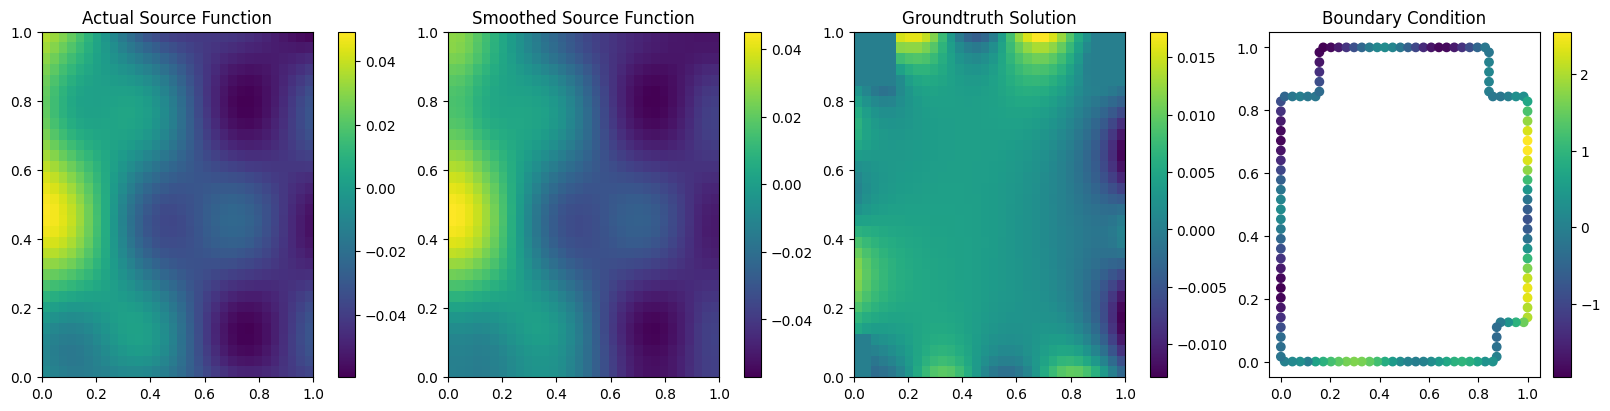

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)
from matplotlib import cm

i = 3
absmax = np.max(np.abs(all_a[i,:]))
pcm = ax1.pcolormesh(x_mesh, y_mesh, all_a[i,:].reshape(32, 32), shading='auto', cmap="viridis")
fig.colorbar(pcm, ax=ax1)
ax1.set_title("Actual Source Function")

absmax = np.max(np.abs(all_a_reshape[i]))
pcm = ax2.pcolormesh(x_mesh, y_mesh, all_a_reshape[i], shading='auto', cmap="viridis")
fig.colorbar(pcm, ax=ax2)
ax2.set_title("Smoothed Source Function")

absmax = np.max(np.abs(all_u[i]))
pcm = ax3.pcolormesh(x_mesh, y_mesh, all_u[i].reshape(32,32), shading='auto', cmap="viridis")
fig.colorbar(pcm, ax=ax3)
ax3.set_title("Groundtruth Solution")

absmax = np.max(np.abs(bc_euco[i,:,2]))
pcm = ax4.scatter(y_mesh_bc, x_mesh_bc, c=bc_euco[i,:,2], cmap="viridis")
fig.colorbar(pcm, ax=ax4)
ax4.set_title("Boundary Condition")


# 3. Normalization

In [118]:
# Process in-domain and out-of-domain data separately
indomain_a = np.array([])
indomain_u = np.array([])

for j in range(ntrain):
    outdomain_idx=np.array([],dtype=int)
    indomain_idx=np.array([],dtype=int)
    for p in range(f_all.shape[1]):
        # If the cell is not in-domain, add it to the out-of-domain index
        if (cells_state[j][p]!=0):
            outdomain_idx=np.append(outdomain_idx,int(p))

    # If the cell is in-domain, add it to the in-domain index
    indomain_idx = list(set([i for i in range(resolution*resolution)]) - set(list(outdomain_idx)))
    indomain_u = np.append(indomain_u,sol_all[j][indomain_idx])
    indomain_a = np.append(indomain_a,f_all[j][indomain_idx][:,2])

# Convert to tensors
indomain_u=torch.tensor(indomain_u)
indomain_a=torch.tensor(indomain_a)

# Initialize normalizers for in-domain data
a_normalizer = GaussianNormalizer(indomain_a)
train_a = a_normalizer.encode(train_a)
test_a = a_normalizer.encode(test_a)


# Normalize the smoothed source function
as_normalizer = GaussianNormalizer(train_a_smooth)
train_a_smooth = as_normalizer.encode(train_a_smooth)
test_a_smooth = as_normalizer.encode(test_a_smooth)

# Normalize the gradient of the source function
agx_normalizer = GaussianNormalizer(train_a_gradx)
train_a_gradx = agx_normalizer.encode(train_a_gradx)
test_a_gradx = agx_normalizer.encode(test_a_gradx)
agy_normalizer = GaussianNormalizer(train_a_grady)
train_a_grady = agy_normalizer.encode(train_a_grady)
test_a_grady = agy_normalizer.encode(test_a_grady)

# Normalize the solution function
u_normalizer = GaussianNormalizer(x=indomain_u)
train_u = u_normalizer.encode(train_u)




## 4. Graph Construction

First construct graph data for train dataset.

In [119]:
# Initialize mesh generator
grid_input=f_all[-1,:,0:2]  # grid_inpus is of shape 1024*2 which is the coordinates of all nodes
meshgenerator = MeshGenerator([[0,1],[0,1]],[s,s], grid_input = grid_input)


# Construct graph data for training
data_train = []
for j in range(ntrain):
    mesh_idx_temp=[p for p in range(resolution**2)]
    outdomain_idx=np.array([])
    for p in range(f_all.shape[1]):
        if (cells_state[j][p]!=0):  # = 0 means the cell is in domain
            outdomain_idx=np.append(outdomain_idx,p)
    for p in range(len(outdomain_idx)):
            mesh_idx_temp.remove(outdomain_idx[p])


    dist2bd_x=np.array([0,0])[np.newaxis,:]
    dist2bd_y=np.array([0,0])[np.newaxis,:]

    # Compute distance to boundary for each point in the mesh
    for p in range(len(mesh_idx_temp)):
        indomain_x = coord_all[j][mesh_idx_temp[p]][0] # e.g. 0.5
        indomain_y = coord_all[j][mesh_idx_temp[p]][1] # e.g. 0.3

        # Find boundary points that have the same x-coordinate (0.5)
        horizon_bd_y = np.where(bc_euco_train[j,:,0].round(4) == indomain_x.round(4))[0]

        # Calculate distances to these boundary points
        dist2bd_y_temp = np.array(
            [np.abs(bc_euco_train[j,horizon_bd_y[0],1] - indomain_y),
             np.abs(bc_euco_train[j,horizon_bd_y[1],1] - indomain_y)
            ]
        )
        dist2bd_y = np.vstack([dist2bd_y,dist2bd_y_temp[np.newaxis,:]])

        # Find boundary points that have the same y-coordinate (0.3)
        horizon_bd_x = np.where(bc_euco_train[j,:,1].round(4) == indomain_y.round(4))[0]

        # Calculate distances to these boundary points
        dist2bd_x_temp = np.array(
            [np.abs(bc_euco_train[j,horizon_bd_x[0],0] - indomain_x),
             np.abs(bc_euco_train[j,horizon_bd_x[1],0] - indomain_x)
            ]
        )
        dist2bd_x = np.vstack([dist2bd_x,dist2bd_x_temp[np.newaxis,:]])


    dist2bd_y = torch.tensor(dist2bd_y[1:]).float()
    dist2bd_x = torch.tensor(dist2bd_x[1:]).float() # [num, 2]


    idx = meshgenerator.sample(mesh_idx_temp)  #这一步只是将indomain的idx输入，并赋给get_grid
    grid = meshgenerator.get_grid()

    xx=to_np_array(grid[:,0])
    yy=to_np_array(grid[:,1])
    triang = tri.Triangulation(xx, yy)
    tri_edge = triang.edges

    edge_index = meshgenerator.ball_connectivity(ns=10,tri_edge=tri_edge)
    edge_attr = meshgenerator.attributes(theta=train_a[j,:]) # theta is the source function, used for attributes
    train_x = torch.cat([grid, train_a[j, idx].reshape(-1, 1),
                             train_a_smooth[j, idx].reshape(-1, 1), train_a_gradx[j, idx].reshape(-1, 1),
                             train_a_grady[j, idx].reshape(-1, 1), dist2bd_x,dist2bd_y
                            ], dim=1)
    train_x_2 = torch.cat([grid, torch.zeros([grid.shape[0],4]), dist2bd_x,dist2bd_y
                            ], dim=1)

    bd_coord_input = torch.tensor(bc_euco_train[j])

    bd_coord_input_1=bd_coord_input.clone()
    bd_coord_input_1[:,2]=0

    # Add edge features for boundary conditions
    bd_idx = [p for p in range(len(bd_coord_input))]
    bd_grid_input = bd_coord_input[:, 0:2]

    # Create a generator
    bd_meshgenerator = MeshGenerator([[0,1],[0,1]],[s,s], grid_input = bd_grid_input)
    bd_idx_mesh = bd_meshgenerator.sample(bd_idx)
    bd_grid = bd_meshgenerator.get_grid()

    # Boudnary edge features for non zero
    bd_edge_index = bd_meshgenerator.ball_connectivity(ns=3)
    bd_edge_attr = bd_meshgenerator.attributes(theta=bd_coord_input[:,2]) # theta is the source function, used for attributes

    # Boudnary edge features for non zero
    bd_edge_index_1 = bd_meshgenerator.ball_connectivity(ns=3)
    bd_edge_attr_1 = bd_meshgenerator.attributes(theta=bd_coord_input_1[:,2]) # theta is the source function, used for attributes

    data=HeteroData()
    data['G1'].x=train_x #node features ▲u=f
    data['G1'].boundary=bd_coord_input_1 #boundary value=0
    data['G1'].edge_features=edge_attr
    data['G1'].sample_idx=idx
    data['G1'].edge_index=edge_index
    data['G1'].bd_edge_index=bd_edge_index
    data['G1'].bd_edge_features=bd_edge_attr

    data['G2'].x=train_x_2  ##node features ▲u=0
    data['G2'].boundary=bd_coord_input #boundary value=g(x)
    data['G2'].edge_features=edge_attr
    data['G2'].sample_idx=idx
    data['G2'].edge_index=edge_index
    data['G2'].bd_edge_index=bd_edge_index_1
    data['G2'].bd_edge_features=bd_edge_attr_1

    data['G1+2'].y=train_u[j, idx]

    data_train.append(data)



In [120]:

data_test = []
for j in range(ntest):
    mesh_idx_temp=[p for p in range(resolution**2)]
    outdomain_idx=np.array([])
    for p in range(f_all.shape[1]):
        if (cells_state[j+ntrain][p]!=0):
            outdomain_idx=np.append(outdomain_idx,p)

    for p in range(len(outdomain_idx)):
            mesh_idx_temp.remove(outdomain_idx[p])

    dist2bd_x=np.array([0,0])[np.newaxis,:]
    dist2bd_y=np.array([0,0])[np.newaxis,:]
    for p in range(len(mesh_idx_temp)):
        indomain_x = coord_all[j+ntrain][mesh_idx_temp[p]][0]
        indomain_y = coord_all[j+ntrain][mesh_idx_temp[p]][1]

        horizon_bd_y = np.where(bc_euco_test[j,:,0].round(4) == indomain_x.round(4))[0]

        dist2bd_y_temp = np.array(
            [np.abs(bc_euco_test[j,horizon_bd_y[0],1] - indomain_y),
             np.abs(bc_euco_test[j,horizon_bd_y[1],1] - indomain_y)
            ]
        )
        dist2bd_y = np.vstack([dist2bd_y,dist2bd_y_temp[np.newaxis,:]])
        horizon_bd_x = np.where(bc_euco_test[j,:,1].round(4) == indomain_y.round(4))[0]

        dist2bd_x_temp = np.array(
            [np.abs(bc_euco_test[j,horizon_bd_x[0],0] - indomain_x),
             np.abs(bc_euco_test[j,horizon_bd_x[1],0] - indomain_x)
            ]
        )
        dist2bd_x = np.vstack([dist2bd_x,dist2bd_x_temp[np.newaxis,:]])
    dist2bd_y = torch.tensor(dist2bd_y[1:]).float()
    dist2bd_x = torch.tensor(dist2bd_x[1:]).float() # [num, 2]



    idx = meshgenerator.sample(mesh_idx_temp)
    grid = meshgenerator.get_grid()

    xx=to_np_array(grid[:,0])
    yy=to_np_array(grid[:,1])
    triang = tri.Triangulation(xx, yy)
    tri_edge = triang.edges

    edge_index = meshgenerator.ball_connectivity(ns=10,tri_edge=tri_edge)
    edge_attr = meshgenerator.attributes(theta=test_a[j,:])

    test_x = torch.cat([grid, test_a[j, idx].reshape(-1, 1),
                        test_a_smooth[j, idx].reshape(-1, 1), test_a_gradx[j, idx].reshape(-1, 1),
                        test_a_grady[j, idx].reshape(-1, 1),dist2bd_x,dist2bd_y
                       ], dim=1)
    test_x_2 = torch.cat([grid, torch.zeros([grid.shape[0],4]), dist2bd_x,dist2bd_y
                            ], dim=1)

    # Add edge features for boundary conditions
    bd_idx = [p for p in range(len(bd_coord_input))]

    bd_grid_input = bd_coord_input[:, 0:2]

    # Create a generator
    bd_meshgenerator = MeshGenerator([[0,1],[0,1]],[s,s], grid_input = bd_grid_input)
    bd_idx_mesh = bd_meshgenerator.sample(bd_idx)
    bd_grid = bd_meshgenerator.get_grid()

    # Boudnary edge features for non zero
    bd_edge_index = bd_meshgenerator.ball_connectivity(ns=3)
    bd_edge_attr = bd_meshgenerator.attributes(theta=bd_coord_input[:,2]) # theta is the source function, used for attributes

    # Boudnary edge features for non zero
    bd_edge_index_1 = bd_meshgenerator.ball_connectivity(ns=3)
    bd_edge_attr_1 = bd_meshgenerator.attributes(theta=bd_coord_input_1[:,2]) # theta is the source function, used for attributes

    data=HeteroData()
    data['G1'].x=test_x #node features ▲u=f
    data['G1'].boundary=bd_coord_input_1 #boundary value=0
    data['G1'].edge_features=edge_attr
    data['G1'].sample_idx=idx
    data['G1'].edge_index=edge_index
    data['G1'].bd_edge_index=bd_edge_index
    data['G1'].bd_edge_features=bd_edge_attr

    data['G2'].x=test_x_2  ##node features ▲u=0
    data['G2'].boundary=bd_coord_input #boundary value=g(x)
    data['G2'].edge_features=edge_attr
    data['G2'].sample_idx=idx
    data['G2'].edge_index=edge_index
    data['G2'].bd_edge_index=bd_edge_index_1
    data['G2'].bd_edge_features=bd_edge_attr_1

    data['G1+2'].y=test_u[j, idx]

    data_test.append(data)

In [109]:
print(f"{len(data_train)} training data")
print(f" Training data examples: {data_train[0]}")
print(f"{len(data_test)} testing data")
print(f" Testing data examples: {data_test[0]}")

90 training data
 Training data examples: HeteroData(
  G1={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G2={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G1+2={ y=[987] }
)
10 testing data
 Testing data examples: HeteroData(
  G1={
    x=[1024, 10],
    boundary=[128, 3],
    edge_features=[12408, 7],
    sample_idx=[1024],
    edge_index=[2, 12408],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G2={
    x=[1024, 10],
    boundary=[128, 3],
    edge_features=[12408, 7],
    sample_idx=[1024],
    edge_index=[2, 12408],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G1+2={ y=[1024] }
)


What each component represent
1. G1: the graph that solves $\Delta u = f$ with zero boundary.
    - x = [num\_nodes, num\_node\_features]: features include coordinates, a(x, y), smoothed a, gradients, distance to boundary

    - boundary = [num\_boundary\_nodes, 3] : number of nodes that are on the boundaries, 3 values are x y coordinates and boundar value which is 0

    - edge\_features = [num\_edges, num\_edge\_features]: features are [x1,y1, x2, y2, theta1, theta2, distance]

    - sample\_indx = [num\_nodes]:  Indices of the mesh points being used
    - edge_index = [2, num\_edges]:  Connectivity matrix: 2 rows (source,target), 6733 edges
    - bd_edge_index = [2, num_edges_on_boundary]: connectivity matrix of 2 rows on the boudnary
    - bd_edge_features = [num\_edges\_on\_boundary, num\_edge\_features\_on\_ boundaries]: features are [x1,y1, x2, y2, 0, 0, distance]

2.  G2: that graph solves $\Delta u = 0$ with given boundary condition $g(x)$
    - x = [num\_nodes, num\_node\_features]: Same structure as G1 but different features, zero source term instead of f

    - boundary = [num\_boundary\_nodes, 3] : Boundary points with actual boundary values g(x)

    - edge\_features = [num\_edges, num\_edge\_features]: Same edge features as G1
    - sample\_indx = [num\_nodes]:  Same indices as G1
    - edge_index = [2, num\_edges]:  Same connectivity as G1

3. G1+2: Combined solution target
    - y = [num\_target\_nodes]: values of solution at the target nodes
)


# 5. Load Data and Models

In [26]:
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size2, shuffle=False)
t2 = default_timer()

logger.info('preprocessing finished, time used:{}', t2-t1)
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

if args.act == 'leakyrelu':
    activation = nn.LeakyReLU
elif args.act == 'elu':
    activation = nn.ELU
elif args.act == 'relu':
    activation = nn.ReLU
else:
    activation = nn.SiLU

model = HeteroGNSGPS(nnode_in_features = node_features, nnode_out_features = 1, nedge_in_features = edge_features, nmlp_layers=args.nmlp_layers,
             activation = activation,boundary_dim = args.boundary_dim,trans_layer = trans_layer).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=16, T_mult=2)
myloss = LpLoss(size_average=False)
u_normalizer.cuda(device)
ttrain = np.zeros((epochs, ))
ttest = np.zeros((epochs,))
model.train()

data_record = {}

2025-04-02 12:18:54.736 | INFO     | __main__:<cell line: 0>:5 - preprocessing finished, time used:94.19379635900003


In [27]:
model

HeteroGNSGPS(
  (_encoder): Encoder(
    (node_fn): Sequential(
      (0): Sequential(
        (NN-0): Linear(in_features=10, out_features=128, bias=True)
        (Act-0): SiLU()
        (NN-1): Linear(in_features=128, out_features=128, bias=True)
        (Act-1): SiLU()
        (NN-2): Linear(in_features=128, out_features=128, bias=True)
        (Act-2): SiLU()
        (NN-3): Linear(in_features=128, out_features=128, bias=True)
        (Act-3): Identity()
      )
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (edge_fn): Sequential(
      (0): Sequential(
        (NN-0): Linear(in_features=7, out_features=128, bias=True)
        (Act-0): SiLU()
        (NN-1): Linear(in_features=128, out_features=128, bias=True)
        (Act-1): SiLU()
        (NN-2): Linear(in_features=128, out_features=128, bias=True)
        (Act-2): SiLU()
        (NN-3): Linear(in_features=128, out_features=128, bias=True)
        (Act-3): Identity()
      )
      (1): LayerNorm((128,)

Try out the model

In [28]:
data_train[0]

HeteroData(
  G1={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G2={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G1+2={ y=[987] }
)

### Check the transformer architecture for boundary encoding.

In [29]:
transformer = model._processor.gnn_stacks[0].boundary_fn
transformer

GPS(
  (node_emb): DataEmbedding_wo_temp(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(3, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TemporalEmbedding(
      (hour_embed): FixedEmbedding(
        (emb): Embedding(24, 128)
      )
      (weekday_embed): FixedEmbedding(
        (emb): Embedding(7, 128)
      )
      (day_embed): FixedEmbedding(
        (emb): Embedding(32, 128)
      )
      (month_embed): FixedEmbedding(
        (emb): Embedding(13, 128)
      )
    )
    (dropout): Dropout(p=0, inplace=False)
  )
  (convs): ModuleList(
    (0-2): 3 x GPSConv(128, conv=GINEConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): GELU(approximate='none')
      (2): Linear(in_features=128, out_features=128, bias=True)
    )), heads=4, attn_type=multihead)
  )
  (mlp): Sequential(
    (0): Linear(in_features=128,

The transformer performs input embedding and passes the embedding into the encoder.

The procedure of embedding is as below

Conduct max pooling on the last dimension

### Now test this new transformer

# 6. Train!

In [30]:
epochs = args.epochs

for ep in range(epochs):
    model.train() #改的
    t1 = default_timer()
    train_mse = 0.0
    train_l2 = 0.0
    for batch in train_loader:

        # n = np.random.randint(2)
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))

        loss.backward()
        l2 = myloss(
            u_normalizer.decode(out.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1)),
            u_normalizer.decode(batch['G1+2'].y.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1))) #G1和G2的sanmple_idx是一样的

        # pdb.set_trace()
        optimizer.step()
        train_mse += loss.item()
        train_l2 += l2.item()

    scheduler.step()
    t2 = default_timer()

    model.eval()
    test_l2 = 0.0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            out = model(batch)
            out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
            test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

    t3 = default_timer()
    ttrain[ep] = train_l2/(ntrain)
    ttest[ep] = test_l2/ntest
    logger.info(f"Epoch {ep:03d}     train_Loss: {train_mse/len(train_loader):.6f}  \t train_L2: {train_l2/(ntrain):.6f}\t test_L2: {test_l2/ntest:.6f}")
    record_data(data_record, [ep, train_mse/len(train_loader), train_l2/(ntrain), test_l2/ntest], ["epoch", "train_MSE", "train_L2", "test_L2"])
    if ep % inspect_interval == 0 or ep == epochs - 1:
        record_data(data_record, [ep, to_cpu(model.state_dict())], ["save_epoch", "state_dict"])
        pickle.dump(data_record, open(path_model, "wb"))

2025-04-02 12:19:33.648 | INFO     | __main__:<cell line: 0>:41 - Epoch 000     train_Loss: 1.015862  	 train_L2: 1.009746	 test_L2: 0.995300
2025-04-02 12:20:04.918 | INFO     | __main__:<cell line: 0>:41 - Epoch 001     train_Loss: 0.947125  	 train_L2: 0.983018	 test_L2: 1.017056
2025-04-02 12:20:35.456 | INFO     | __main__:<cell line: 0>:41 - Epoch 002     train_Loss: 0.937121  	 train_L2: 0.982323	 test_L2: 1.008937
2025-04-02 12:21:06.121 | INFO     | __main__:<cell line: 0>:41 - Epoch 003     train_Loss: 0.839204  	 train_L2: 0.943188	 test_L2: 0.988418
2025-04-02 12:21:36.603 | INFO     | __main__:<cell line: 0>:41 - Epoch 004     train_Loss: 0.777159  	 train_L2: 0.910939	 test_L2: 0.981765
2025-04-02 12:22:07.217 | INFO     | __main__:<cell line: 0>:41 - Epoch 005     train_Loss: 0.748821  	 train_L2: 0.893870	 test_L2: 0.978031
2025-04-02 12:22:37.171 | INFO     | __main__:<cell line: 0>:41 - Epoch 006     train_Loss: 0.732392  	 train_L2: 0.885180	 test_L2: 0.987791
2025-0

In [34]:
train_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc+ '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+ '_train.npy'

test_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc + '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+ '_test.npy'

result_path = os.path.join(cwd, "log")
train_path = os.path.join(result_path,train_file)
test_path = os.path.join(result_path, test_file)
np.save(train_path, ttrain)
np.save(test_path, ttest)

# Test

In [121]:
print(f"Train: {np.average(ttrain)} +- {np.std(ttrain)}")
print(f"Test: {np.average(ttest)} +- {np.std(ttest)}")

Train: 0.31262935331732866 +- 0.2184658305405741
Test: 1.2578038091182706 +- 0.09435696246659048


In [35]:
from google.colab import files
files.download('/content/beno/results/Resolution_32_poisson_ntrain90_kerwidth256_bd_enc_GPS3_Rollingregular_shapemix_ns100_nheads4_bddim128_actsilulr5e-05_nmlp_layers3_epochs1000')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size2, shuffle=False)
t2 = default_timer()

test_l2 = 0.0
test_mse = 0.0

with torch.no_grad():
    for batch in train_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
        test_mse += loss.item()
        out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
        test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
        test_mse += loss.item()
        out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
        test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

print(f"l2 {test_l2 / 100:.6f}, mse { test_mse / 100 :.6f}")

l2 1.031482, mse 0.911664


## Plot Solution vs Prediction

In [134]:
i = 80
with torch.no_grad():
    batch = data_train[i]
    out = model(batch.to(device))
    print(out.shape)
    out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
    print(out.shape)
    print(batch['G1+2'].y.shape)
    print(batch['G1+2'].y.view(batch_size2, -1).shape)
    idx = batch['G1'].sample_idx


torch.Size([996, 1])
torch.Size([1, 996])
torch.Size([996])
torch.Size([1, 996])


In [135]:
cwd = os.getcwd()
plot_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
     '_shape' + str(args.bd_shape) +'_Rolling' + args.init_boudary_loc+'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+'_epochs' + str(args.epochs) +"_test_2c.png"

plots_path = os.path.join(cwd, "plots")
plot_path = os.path.join(plots_path, plot_file)


In [136]:
num_points = len(coord_all[i, :, :])
length = int(np.sqrt(num_points))
idx = batch['G1'].sample_idx.detach().cpu().numpy()

x_mesh = coord_all[i,:, 0].reshape(32, 32)
y_mesh = coord_all[i,:, 1].reshape(32, 32)
y_true = np.zeros(num_points)
y_pred = np.zeros(num_points)

y_true[idx] = batch['G1+2'].y.detach().cpu().numpy()
y_pred[idx] = out.squeeze().detach().cpu().numpy()


mask = np.zeros((len(coord_all[i, :, :])), dtype=bool)
mask[idx] = True
y_true_masked = np.ma.masked_where(~mask, y_true)
y_pred_masked = np.ma.masked_where(~mask, y_pred)



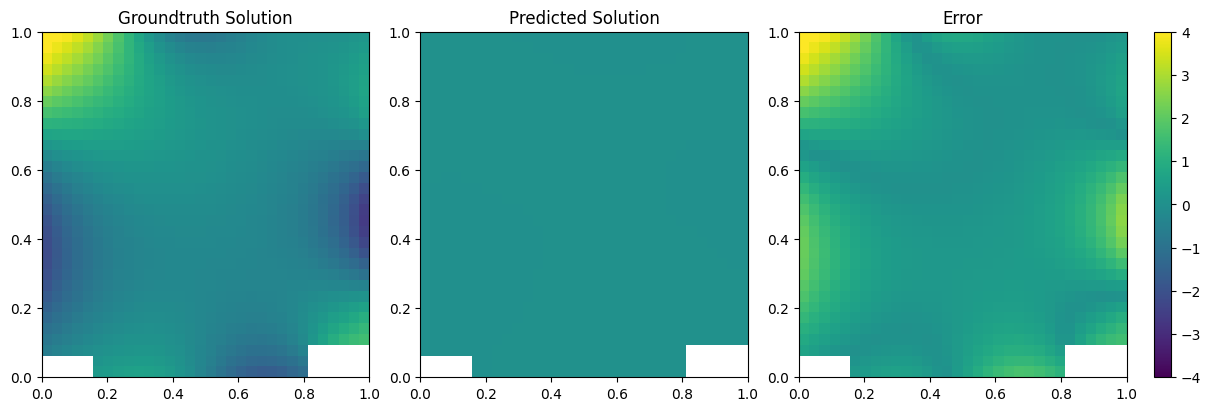

In [137]:

fig, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

absmax = np.max(np.abs(all_u[i]))
pcm = ax3.pcolormesh(x_mesh, y_mesh, y_true_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

ax3.set_title("Groundtruth Solution")

absmax = np.max(np.abs(all_u[i]))
pcm = ax4.pcolormesh(x_mesh, y_mesh, y_pred_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

ax4.set_title("Predicted Solution")

absmax = np.max(np.abs(all_u[i]))
pcm = ax5.pcolormesh(x_mesh, y_mesh, np.abs(y_pred_masked - y_true_masked).reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)
fig.colorbar(pcm, ax=ax5)

ax5.set_title("Error")

plt.savefig(plot_path)


In [ ]:
loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
loss.item()

0.44509798288345337

In [ ]:
myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

0.7387213706970215